Corinne 7-14

In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics.pairwise import euclidean_distances
from scipy import stats
from sklearn.decomposition import PCA

### Load Data and Embeddings ###

#### CAFs(s) ####

Load y_train from dataset (need it for plot)

In [14]:
path = '/Users/corinne/Documents/GitHub/honors/HowUMAPWorks-master/data/'
expr = pd.read_csv(path + 'bartoschek_filtered_expr_rpkm.txt', sep='\t')
y_train = expr.values[:,expr.shape[1]-1]
n = y_train.shape[0]
print("This data set contains " + str(n) + " samples")


This data set contains 716 samples


Load PCA and UMAP embeddings

In [46]:
pcaM = np.load("scaled_plots/CAFs_pca.npy")
print(pcaM.shape)
umapM = np.load("scaled_plots/CAFs_umap.npy")
print(umapM.shape)

(716, 2)
(716, 2)


#### Cell Mix 980(s) ####

Load y_train from dataset (need it for plot)

In [56]:
path = '/Users/corinne/Documents/GitHub/honors/HowUMAPWorks-master/data/'
y_train = pd.read_csv(path + 'CellMixLabels.csv', header=None)
y_train = y_train.iloc[:, 0].to_numpy()
y_train = y_train[::4,] # subsample of 980
n = y_train.shape[0]
print("This data set contains " + str(n) + " samples")

This data set contains 980 samples


Load PCA and UMAP embeddings

In [77]:
pcaM = np.load("scaled_plots/Cell980_pca.npy")
print(pcaM.shape)
umapM = np.load("scaled_plots/Cell980_umap.npy")
print(umapM.shape)

(980, 2)
(980, 2)


### Scale and Concatenate ###

Load scale for norm

In [152]:
# I THINK THIS IS A BAD IDEA - CORINNE 7-18
# "in between" plot: load L0/L1
#pca_factor = np.load("scaled_plots/Cell980_L0dL1.npy")
#print(pca_factor)
#pcaM = pcaM * pca_factor
# leave UMAP-m norm = 1

9.10624913125097


In [78]:
# adjust norm?
alpha = 0.25
umapM = umapM * (alpha)
pcaM = pcaM * (1-alpha)

In [79]:
print(LA.norm(umapM))

0.25000000000000006


Concatenate PCA-m, UMAP-m

In [80]:
concat_emb = np.concatenate((pcaM,umapM), axis=1)
print(concat_emb.shape)

(980, 4)


Reduce to 2 dimensions with PCA

In [81]:
reducer = PCA(n_components=2, random_state=42)
emb = reducer.fit_transform(concat_emb)

In [61]:
print(emb.shape)

(980, 2)


In [83]:
emb = emb / LA.norm(emb) # normalize scale to 1

In [84]:
print(LA.norm(emb))

0.9999999999999991


In [85]:
np.save("Cell980 0.25.npy", emb)

Plot final embedding

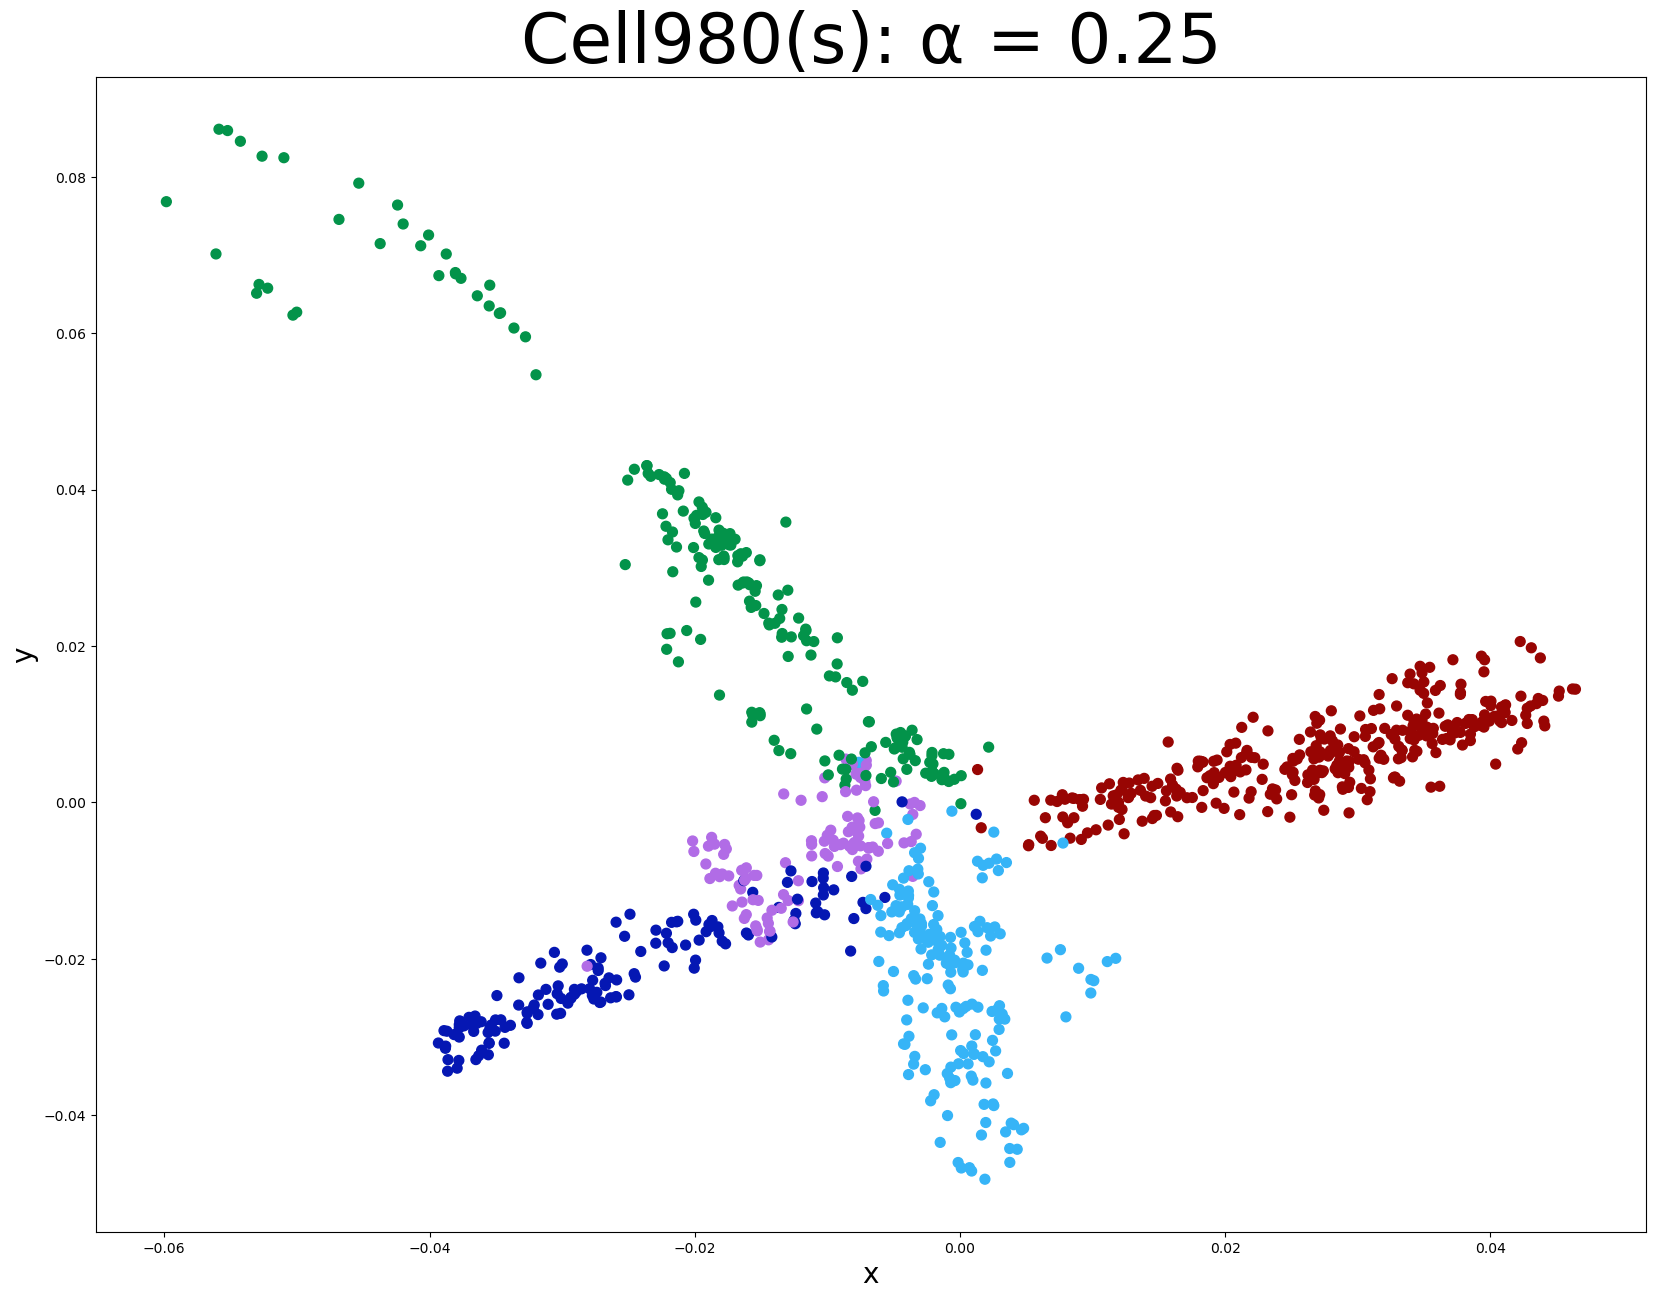

In [86]:
plt.figure(figsize=(20,15))
#colors = ['#17329f','#98034c','#03934a','#6ebac3'] # CAFs
colors = ['#0517b3','#b16ce6','#03934a','#36b4f7','#980503'] # cell mix
mapped_colors = [colors[int(value-1)] for value in y_train]
plt.scatter(emb[:,0], emb[:,1], c = mapped_colors, s = 50) # cell mix
#plt.scatter(emb[:,0], emb[:,1], s = 50, c=y_train, cmap='tab10') # RNA, CAFs
#plt.title("Cell Mix 980 - UMAP initialized with PCA", fontsize = 50)
# \u03B1 = 1/3
# L0/L1(s)
plt.title("Cell980(s): \u03B1 = 0.25", fontsize = 50)
#plt.title("CAFs(s): \u03B1 = 0.75", fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()

Save embedding

In [126]:
np.save("Cell980_emb_L0divL1.npy",emb)